In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/Datasets/Pulsar.csv.zip' -d '/content'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [5]:
pulsars = pd.read_csv('Pulsar.csv')

In [7]:
pulsars.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
pulsars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [11]:
X = pulsars.drop('Class',axis=1)
y = pulsars['Class']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
knnclassifier = KNeighborsClassifier()
svmclassifier = SVC(kernel = 'linear', random_state = 0)
naivebayesclassifier = GaussianNB()
decisiontreeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
randomforestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
knnclassifier.fit(X_train,y_train)
svmclassifier.fit(X_train,y_train)
naivebayesclassifier.fit(X_train,y_train)
decisiontreeclassifier.fit(X_train,y_train)
randomforestclassifier.fit(X_train,y_train)

## Predicting the Test Set results

In [18]:
knn_y_pred = knnclassifier.predict(X_test)
svm_y_pred = svmclassifier.predict(X_test)
naivebayes_y_pred = naivebayesclassifier.predict(X_test)
decisiontree_y_pred = decisiontreeclassifier.predict(X_test)
randomforest_y_pred = randomforestclassifier.predict(X_test)

## Accuracy of Models

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

KNN Classifier

In [38]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(knn_accuracy)

0.9830167597765364


SVM Classifier

In [39]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(svm_accuracy)

0.9812290502793296


Naive Bayes Classifier

In [40]:
naivebayes_accuracy = accuracy_score(y_test, naivebayes_y_pred)
print(naivebayes_accuracy)

0.9506145251396648


Decision Tree Classifier

In [42]:
decision_tree_accuracy = accuracy_score(y_test, decisiontree_y_pred)
print(decision_tree_accuracy)

0.966927374301676


Random Forest Classifier

In [41]:
random_forest_accuracy = accuracy_score(y_test, randomforest_y_pred)
print(random_forest_accuracy)

0.9823463687150839


## Ensemble Classifier using Stacked Generalization

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
# Base Models
level0 = list()
level0.append(('knn', KNeighborsClassifier()))
level0.append(('svm', SVC(kernel = 'linear', random_state = 0)))
level0.append(('naive_bayes', GaussianNB()))
level0.append(('decision_tree', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
level0.append(('random_forest', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))) 

# Meta Learner Model
level1 = LogisticRegression()

# Stacking Ensemble
stacking_ensemble_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
stacking_ensemble_model.fit(X_train,y_train)

In [32]:
stacking_ensemble_y_pred = stacking_ensemble_model.predict(X_test)

In [43]:
stacking_ensemble_accuracy = accuracy_score(y_test,stacking_ensemble_y_pred)
print(stacking_ensemble_accuracy)

0.9825698324022346


## Model Accuracy Comparison

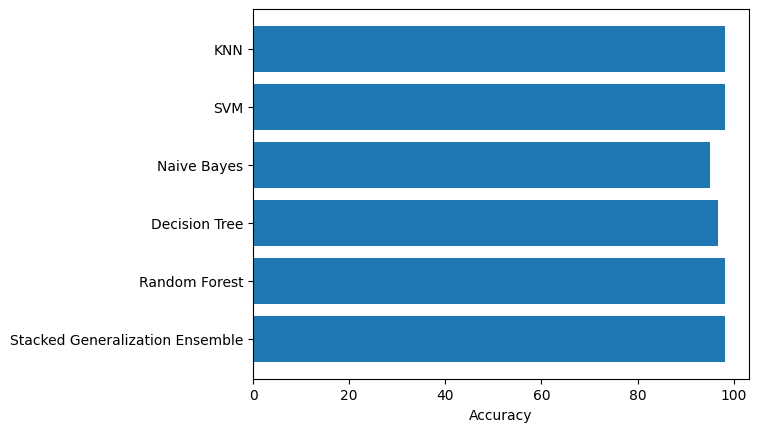

In [47]:
model_names = ['KNN','SVM','Naive Bayes','Decision Tree','Random Forest','Stacked Generalization Ensemble']
accuracies = [knn_accuracy,svm_accuracy,naivebayes_accuracy,decision_tree_accuracy,random_forest_accuracy,stacking_ensemble_accuracy]
accuracies = [i*100 for i in accuracies]
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(model_names))
ax.barh(y_pos, accuracies, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(model_names)
ax.invert_yaxis()  
ax.set_xlabel('Accuracy')
plt.show()